# <font color="Yellow"><b>ST590 Project 1</b></font>
## <font color="Green">Sergio Mora & Vivi Feathers</font>

# <font color="red"><b>Introduction</b></font>
<font color="green">Purples:</font> Predict a value of <i>selling_price</i> for a new motorcycle.

<font color="green">Dataset name:</font> <b>BikeDetails</b> <br>
This dataset contains information about used motorcycles, including their features and selling prices.

<font color="green">Variables used:</font> <i>selling_price</i>, <i>km_driven</i>
<style>
        .tab1 {
            tab-size: 2;
        }
    </style>
<font color="green">Methods:</font><br>
<pre class="tab1">1. Grid search</pre>
<pre class="tab1">2. Gradient descent</pre>
        
<font color="green">Algorithms:</font><br>
<pre class="tab1">1. Using only <i>selling_price</i> to predict c</pre>
<pre class="tab1">2. Using simple linear regression with <i>selling_price</i> and <i>km_driven</i> to predict c</pre>
 
<font color="green">Modules:</font><br>
<pre class="tab1">1. pandas</pre>
<pre class="tab1">2. numpy</pre>
<pre class="tab1">3. matplotlib.pyplot</pre>
<pre class="tab1">4. scipy.stats</pre>

 ## <font color="red">Read in dataset and display the first several rows</font>

In [19]:
### Import modules
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
### Reading the data
bikeDetails = pd.read_csv("bikeDetails.csv")

In [3]:
### Data structure and first several rows
a=bikeDetails.shape
print(a)
bikeDetails.head()

(1061, 7)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


# <font color="red"><b>EDA</b></font>
## <font color="Green"><i>selling_price</i></font>

In [4]:
### General information
bikeDetails["selling_price"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

In [5]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["selling_price"])
print(p)
# not normally distributed, use median and IQR #
median_price = bikeDetails["selling_price"].median()
q1_price = bikeDetails["selling_price"].quantile(q = [0.25])
q3_price = bikeDetails["selling_price"].quantile(q = [0.75])
IQR_price = q3_price[0.75] - q1_price[0.25]
print("The meidian of selling_price is", median_price)
print("The first quartile of selling_price is", q1_price)
print("The third quartile of selling_price is", q3_price)
print("The IQR of selling_price is", IQR_price)

2.972154042832937e-42
The meidian of selling_price is 45000.0
The first quartile of selling_price is 0.25    28000.0
Name: selling_price, dtype: float64
The third quartile of selling_price is 0.75    70000.0
Name: selling_price, dtype: float64
The IQR of selling_price is 42000.0


## <font color="Green"><i>km_driven</i></font>

In [7]:
### General information
bikeDetails["km_driven"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [10]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["km_driven"])
print(p)
# not normally distributed, use median and IQR #
median_km = bikeDetails["km_driven"].median()
q1_km = bikeDetails["km_driven"].quantile(q = [0.25])
q3_km = bikeDetails["km_driven"].quantile(q = [0.75])
IQR_km = q3_km[0.75] - q1_km[0.25]
print("The meidian of km_driven is", median_km)
print("The first quartile of km_driven is", q1_km)
print("The third quartile of km_driven is", q3_km)
print("The IQR of km_driven is", IQR_km)

0.0
The meidian of km_driven is 25000.0
The first quartile of km_driven is 0.25    13500.0
Name: km_driven, dtype: float64
The third quartile of km_driven is 0.75    43000.0
Name: km_driven, dtype: float64
The IQR of km_driven is 29500.0


## <font color="red">Plot of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

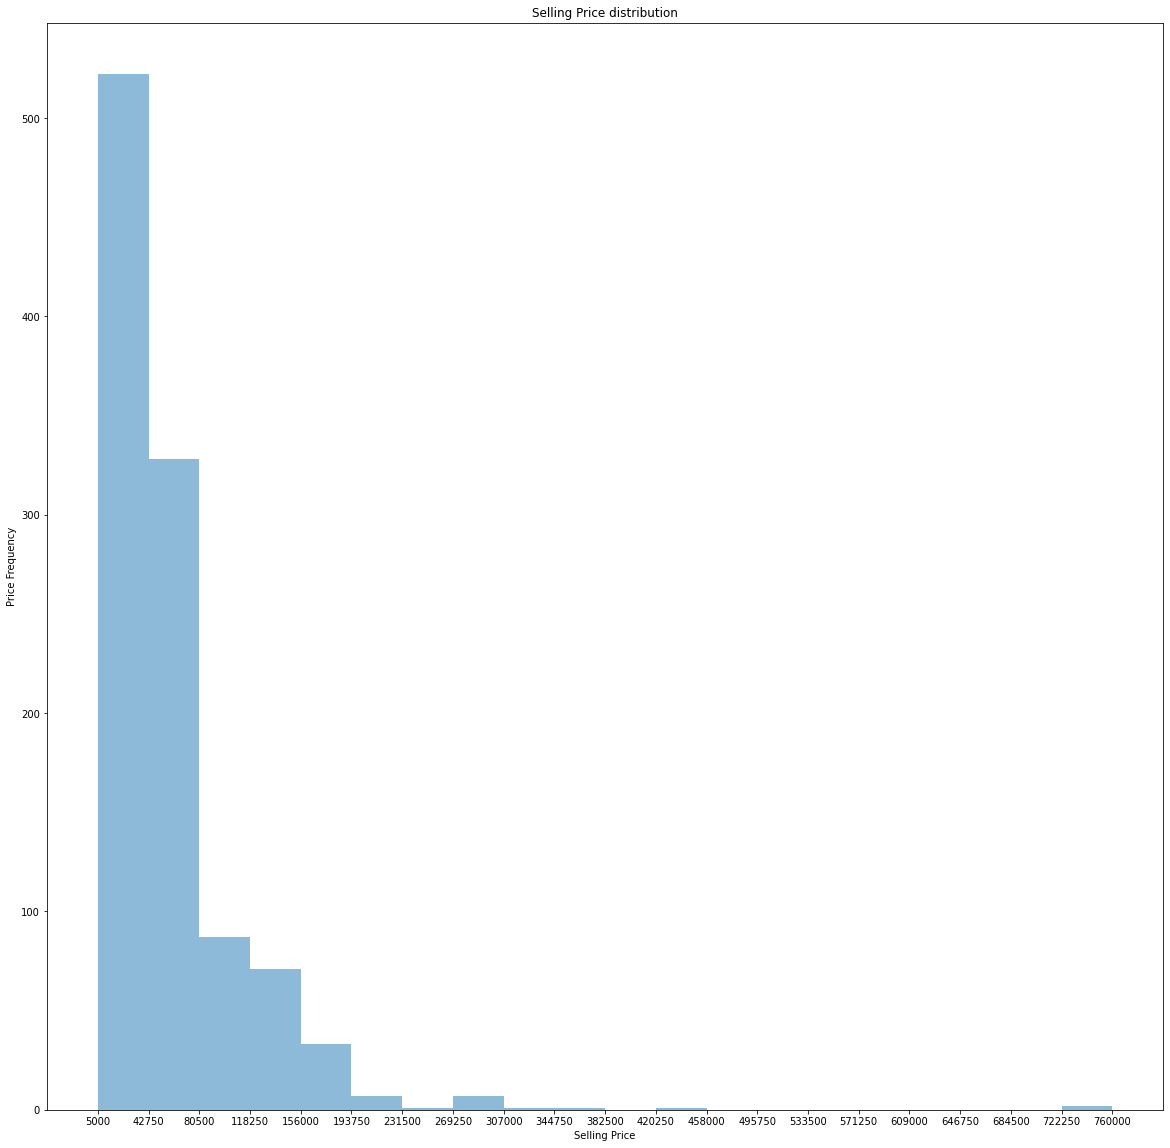

In [29]:
### Histogram for selling_price
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["selling_price"], bins=20, alpha = 0.5)
plt.ylabel("Price Frequency")
plt.xlabel("Selling Price")
plt.xticks(bins)
plt.title("Selling Price distribution")
plt.show()
plt.close()

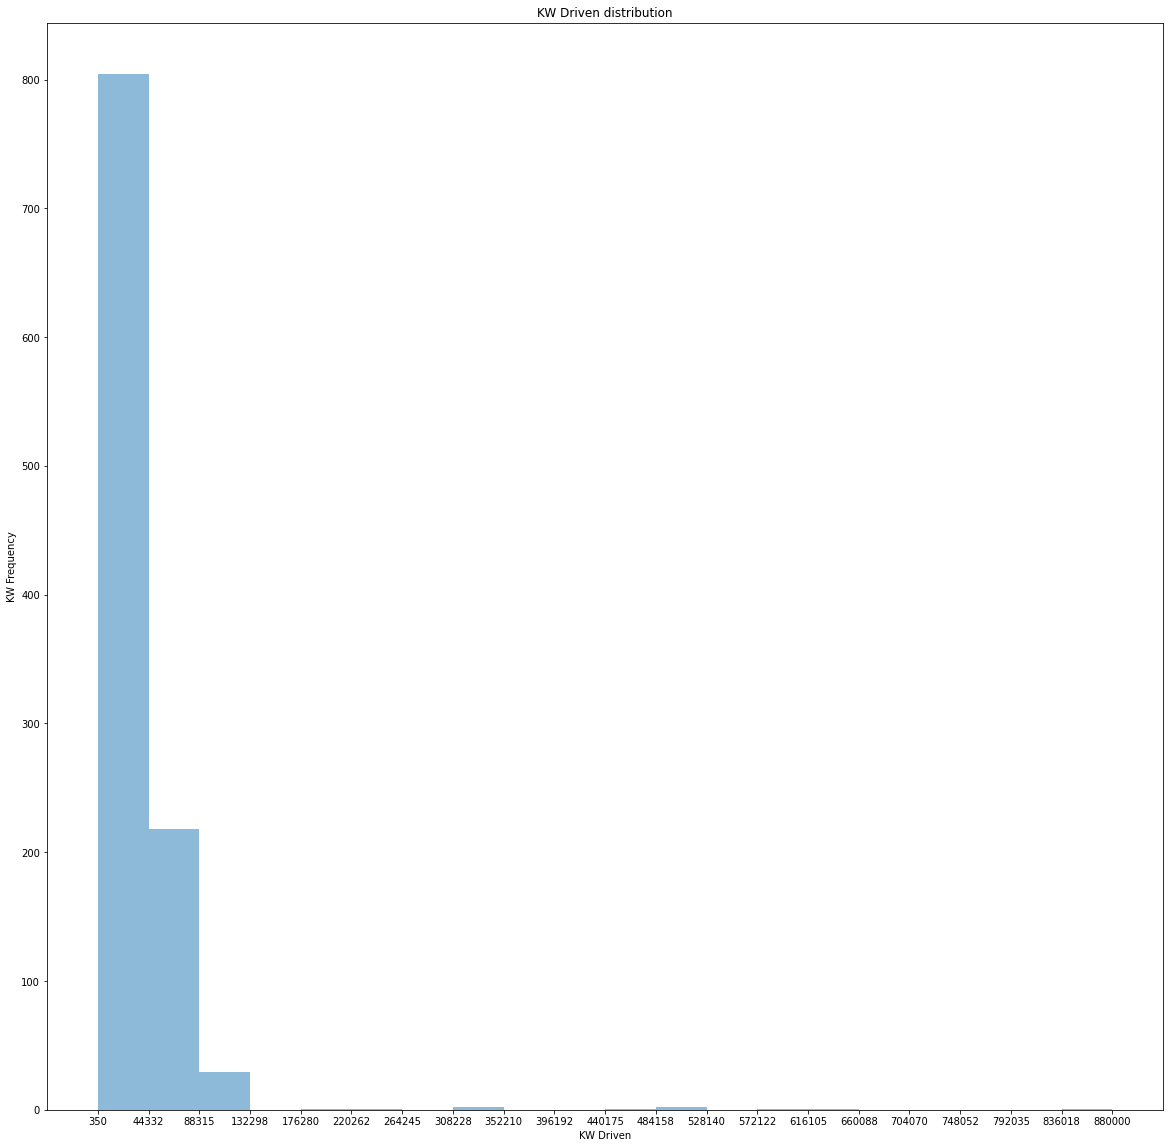

In [31]:
### Histogram for kw_driven
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["km_driven"], bins=20, alpha = 0.5)
plt.ylabel("KW Frequency")
plt.xlabel("KW Driven")
plt.xticks(bins)
plt.title("KW Driven distribution")
plt.show()
plt.close()

## Loss Function

  We start of our analysis with a Loss Function which will help us understand the quality of our methods below. This is done by measuring the Root Mean Square Error (RMSE) which indicates how "off" we were in our model. 
  
  RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^n{L(y_i,c)}} - \sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i - c)^2}}$
  
For this equation to work we want to find the value for c that minimizes the RMSE meaning we have the least amount of "Loss" in our equation.